In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
import warnings
warnings.fit

In [2]:
price  = pd.read_csv('Processed_BT_PriceDB.csv')
tweet  = pd.read_csv('Processed_tweets_db.csv')
tweets=tweet
price

,avg,new_time
0,34703.25220,2021-06-24 23:00:30+03
1,34703.25220,2021-06-24 23:01:00+03
2,34738.71670,2021-06-24 23:01:30+03
3,34700.33330,2021-06-24 23:02:00+03
4,34687.14330,2021-06-24 23:02:30+03
...,...,...
2411,31596.20860,2021-06-26 00:02:00+03
2412,31594.41665,2021-06-26 00:02:30+03
2413,31588.36525,2021-06-26 00:03:00+03
2414,31545.68165,2021-06-26 00:03:30+03


In [4]:
merge=pd.merge(price,tweets, how='left', left_index=False, right_index=False)
merge=merge.dropna()


In [5]:
print(tweets.shape)
print(price.shape)

print(merge.shape)
df1=merge

(2602, 3)
(2416, 2)
(1961, 4)


In [6]:
# setting first name as index column
df1.set_index("new_time", inplace = True)
df1

,avg,neg,pos
new_time,,,
2021-06-24 23:49:30+03,34754.84670,0.0,0.0
2021-06-24 23:50:00+03,34699.95840,0.0,6.0
2021-06-24 23:50:30+03,34721.30500,1.0,6.0
2021-06-24 23:51:00+03,34735.85000,3.0,2.0
2021-06-24 23:51:30+03,34715.51830,2.0,4.0
...,...,...,...
2021-06-25 21:04:00+03,32626.94145,1.0,3.0
2021-06-25 21:04:30+03,32548.59915,0.0,1.0
2021-06-25 21:05:00+03,32575.44910,2.0,1.0


In [8]:
size = int(len(df1)-100)
# Divide into train and test
train_arima, test_arima = df1[0:size], df1[size:len(df1)]

In [9]:
m=ARIMA(train_arima['avg'],order=(1,0,5))
m=m.fit()
m.summary()

D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    avg   No. Observations:                 1861
Model:                     ARMA(1, 5)   Log Likelihood               -9214.669
Method:                       css-mle   S.D. of innovations             34.154
Date:                Sat, 26 Jun 2021   AIC                          18445.339
Time:                        23:27:40   BIC                          18489.570
Sample:                             0   HQIC                         18461.639
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.425e+04    496.944     68.928      0.000    3.33e+04    3.52e+04
ar.L1.avg      0.9988      0.001   1028.566      0.000       0.997       1.001
ma.L1.avg     -0.0544      0.023     -2.333      0.020      -0.100      -0.009
ma.L2.avg      0.0974      0.023      4.188      0.000       0.052       0.143
ma.L3.avg     -0.0610      0.022     -2.771      0.006      -0.104      -0.018
ma.L4.avg      0.0708      0.024      3.004      0.003       0.025       0.117
ma.L5.avg     -0.0096      0.023     -0.419      0.675      -0.054       0.035
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           +0.0000j            1.0012            0.0000
MA.1           -1.0974           -1.4111j            1.7876           -0.3552
MA.2           -1.0974           +1.4111j            1.7876            0.3552
MA.3            1.4429           -1.6718j            2.2083           -0.1367
MA.4            1.4429           +1.6718j            2.2083            0.1367
MA.5            6.6893           -0.0000j            6.6893           -0.0000
-----------------------------------------------------------------------------
"""

In [10]:
start=len(train_arima)
end=len(train_arima)+len(test_arima)-1
pred=m.predict(start=start, end=end,typ='levels')
pred.index=df1.index[start:end+1]
pred

D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


new_time
2021-06-25 20:16:30+03    33365.416297
2021-06-25 20:17:00+03    33366.697537
2021-06-25 20:17:30+03    33367.506205
2021-06-25 20:18:00+03    33366.496141
2021-06-25 20:18:30+03    33367.901080
                              ...     
2021-06-25 21:04:00+03    33461.136653
2021-06-25 21:04:30+03    33462.104688
2021-06-25 21:05:00+03    33463.071539
2021-06-25 21:05:30+03    33464.037210
2021-06-25 21:06:00+03    33465.001701
Length: 100, dtype: float64

<AxesSubplot:xlabel='new_time'>

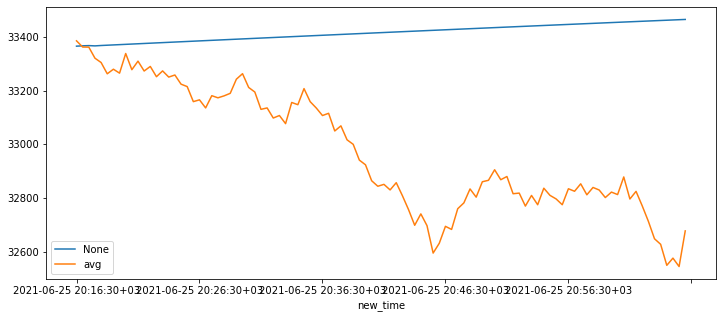

In [11]:
pred.plot(legend=True)
test_arima['avg'].plot(figsize=(12,5),legend=True)

In [12]:
m2=ARIMA(df1['avg'],order=(1,0,0))
m2=m2.fit()
m2.summary()

D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequen

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    avg   No. Observations:                 1961
Model:                     ARMA(1, 0)   Log Likelihood               -9761.077
Method:                       css-mle   S.D. of innovations             35.057
Date:                Sat, 26 Jun 2021   AIC                          19528.155
Time:                        23:28:11   BIC                          19544.898
Sample:                             0   HQIC                         19534.309
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.398e+04    738.738     46.003      0.000    3.25e+04    3.54e+04
ar.L1.avg      0.9993      0.001   1444.808      0.000       0.998       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           +0.0000j            1.0007            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
index_forcasting=pd.date_range(start='2021-06-25 21:06:00+03',end='2021-07-25 21:06:00+03')
pred=m2.predict(start=len(df1),end=len(df1)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_forcasting
pred

D:\SDA\python_new\program\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2021-06-25 21:06:00+03:00    32677.897720
2021-06-26 21:06:00+03:00    32678.801115
2021-06-27 21:06:00+03:00    32679.703885
2021-06-28 21:06:00+03:00    32680.606031
2021-06-29 21:06:00+03:00    32681.507553
2021-06-30 21:06:00+03:00    32682.408452
2021-07-01 21:06:00+03:00    32683.308728
2021-07-02 21:06:00+03:00    32684.208381
2021-07-03 21:06:00+03:00    32685.107412
2021-07-04 21:06:00+03:00    32686.005822
2021-07-05 21:06:00+03:00    32686.903610
2021-07-06 21:06:00+03:00    32687.800778
2021-07-07 21:06:00+03:00    32688.697325
2021-07-08 21:06:00+03:00    32689.593253
2021-07-09 21:06:00+03:00    32690.488561
2021-07-10 21:06:00+03:00    32691.383250
2021-07-11 21:06:00+03:00    32692.277320
2021-07-12 21:06:00+03:00    32693.170772
2021-07-13 21:06:00+03:00    32694.063606
2021-07-14 21:06:00+03:00    32694.955823
2021-07-15 21:06:00+03:00    32695.847423
2021-07-16 21:06:00+03:00    32696.738406
2021-07-17 21:06:00+03:00    32697.628773
2021-07-18 21:06:00+03:00    32698

<AxesSubplot:>

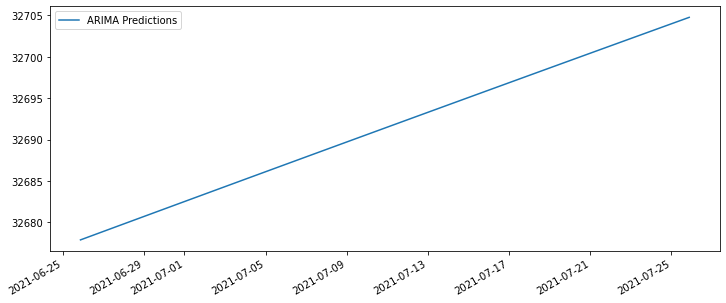

In [14]:
pred.plot(figsize=(12,5),legend=True)